# Part II - Prosper loans dataset exploration
## by HAJI Wissal

## Investigation Overview


> Dans cette investigation, on voulait déterminer les caractéristiques qui influencent le taux d'intérêt ainsi que le statut final du crédit. Par conséquent, on illustrera la relation de la note du créditeur et le salaire avec le taux d'intérêt, ainsi que le cas lié aux entrepreneurs. Pour les relations avec le statut du crédit je me concentrerais plutôt sur l'impacte du salaire et du montant de crédit.


## Dataset Overview

> Le dataset contient 113937 observations sur les crédits issus de la platforme Prosper, parmi les informations présentes on trouve le statut, le taux d'intérêt et la date d'initiation du crédit, ainsi que des détails sur les créditeurs comme le score de crédit, le salaire et le type d'emploie.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

sns.set_style("darkgrid")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv("data/prosperLoanDataCleaned.csv")
df_loan.head(3)

,CreditGrade,Occupation,EmploymentStatus,IncomeRange,LoanOriginationDate,MemberKey,Term,ListingCategory,CreditScoreRangeLower,CreditScoreRangeUpper,TradesNeverDelinquent,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LoanStatus,BorrowerAPR
0,C,Other,Self-employed,"25,000-49,999",2007-09-12,1F3E3376408759268057EDA,36,7,640.0,659.0,0.81,0.17,3083.333333,9425,330.43,Completed,0.16516
1,C,Waiter/Waitress,Full-time,"1-24,999",2007-10-18,59423376541417552B94BD3,36,7,640.0,659.0,0.40,0.27,1666.666667,1000,33.81,Completed,0.15033
2,NR,Other,Not available,"50,000-74,999",2012-04-19,924335448287456229847ED,36,13,700.0,719.0,0.94,0.49,5500.000000,4000,173.71,Defaulted,0.35797


In [3]:
# convert  CreditGrade, IncomeRange into ordered categorical type
ordianl_cols = {
    'CreditGrade' : ['NR','HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
    'IncomeRange' : ['Not displayed','Not employed', '0', '1-24,999', '25,000-49,999', '50,000-74,999', '75,000-99,999', '100,000+']
}

for col, values in ordianl_cols.items():
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories=values)
    df_loan[col] = df_loan[col].astype(ordered_var)

# test
for col in ordianl_cols.keys():
    print(f'{col:-<20}{df_loan[col].unique()}')

CreditGrade---------['C', 'NR', 'D', 'E', 'HR', 'A', 'B', 'AA']
Categories (8, object): ['NR' < 'HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']
IncomeRange---------['25,000-49,999', '1-24,999', '50,000-74,999', '75,000-99,999', '100,000+', 'Not displayed']
Categories (8, object): ['Not displayed' < 'Not employed' < '0' < '1-24,999' < '25,000-49,999' < '50,000-74,999' < '75,000-99,999' < '100,000+']


## Distribution des taux d'intérêts

> Les taux d'intérêt dans ce dataset sont compris entre 0.01 et 0.4 avec un mode au niveau de 0.35.

In [4]:
def freedman_diaconis(data, return_as='width'):
    """Computes the optimal bins width

    Args:
        data (pd.Series): The dataframe column that we wish to plot a histogram for
        returnas: {"width", "bins"}
            If "width", return the estimated width for each histogram bin. 
            If "bins", return the number of bins suggested by rule.
    """
    IQR = data.quantile(0.75) - data.quantile(0.25)
    width= 2 * IQR * np.power(len(data), -(1/3))
    if return_as == "width":
        return width
    else:
        return np.arange(data.min(), data.max()+np.round(width, 3), np.round(width, 3))

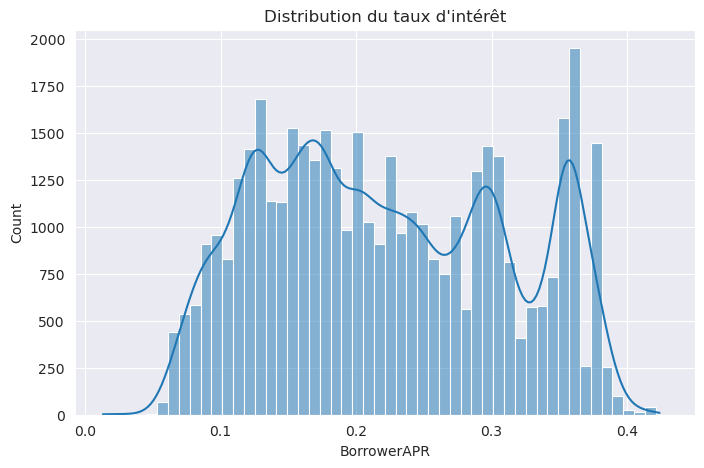

In [5]:
plt.figure(figsize=[8, 5])
sns.histplot(df_loan['BorrowerAPR'], bins = freedman_diaconis(df_loan['BorrowerAPR'], 'bins'), kde=True)
plt.title("Distribution du taux d'intérêt")
plt.show()

## Proportions des variables en relation avec le taux d'intérêt et le statut du crédit

> Pour la variable `CreditGrade` la note la plus faible est `HR` alors que la note la plus élevé est `AA`, en général on n'a pas une grande différence de proportions entre les différentes valeurs (Rappelons que NR signifie "not rated" et n'est pas une note). On constate aussi que les salaires supérieur à 25k par an ainsi que les stauts d'emploiement `Full-time` et `Employed` représentent une proportion assez importante du dataset. 

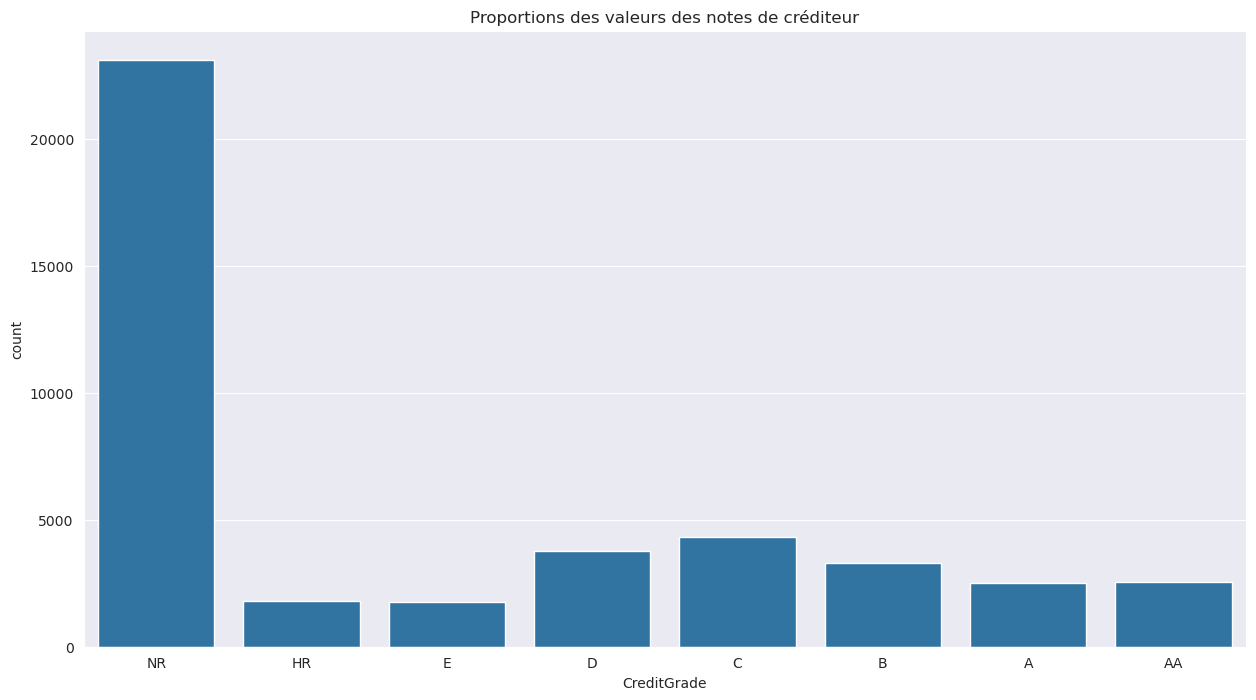

In [6]:
plt.figure(figsize = [15,8])
default_color = sns.color_palette()[0]
sns.countplot(data = df_loan, x = 'CreditGrade', color = default_color).set(title="Proportions des valeurs des notes de créditeur")
plt.show()

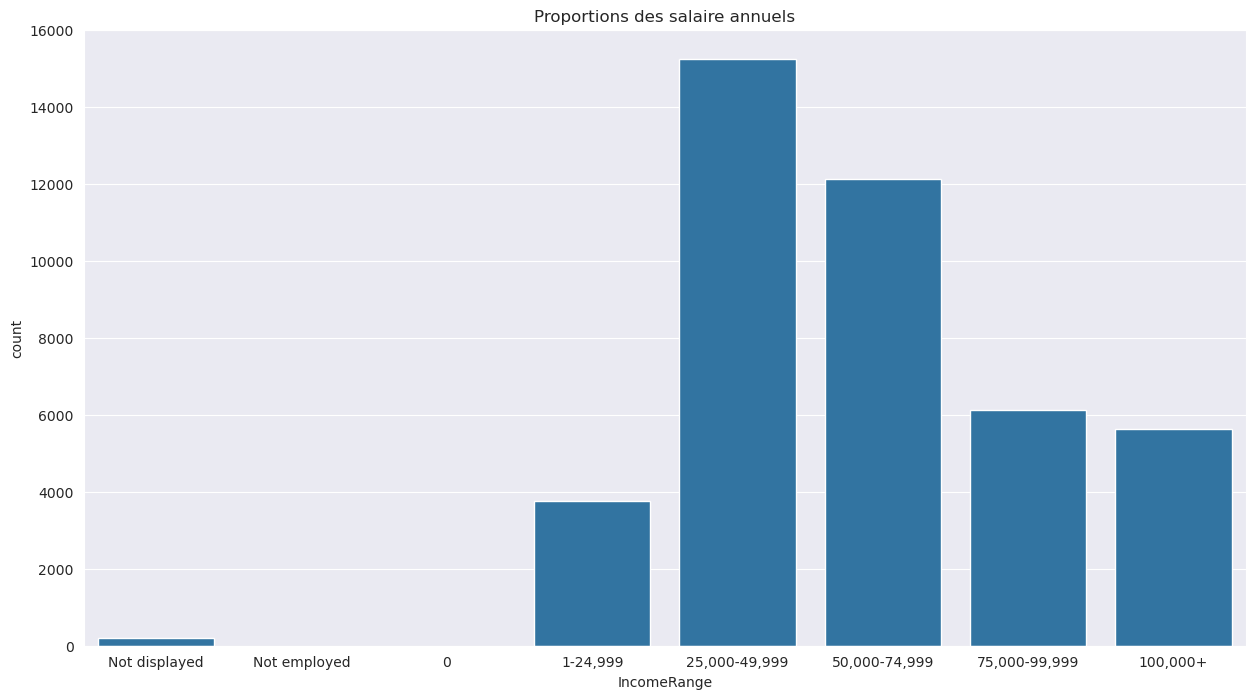

In [7]:
plt.figure(figsize = [15,8])
sns.countplot(data = df_loan, x = 'IncomeRange', color = default_color).set(title="Proportions des salaire annuels")
plt.show()

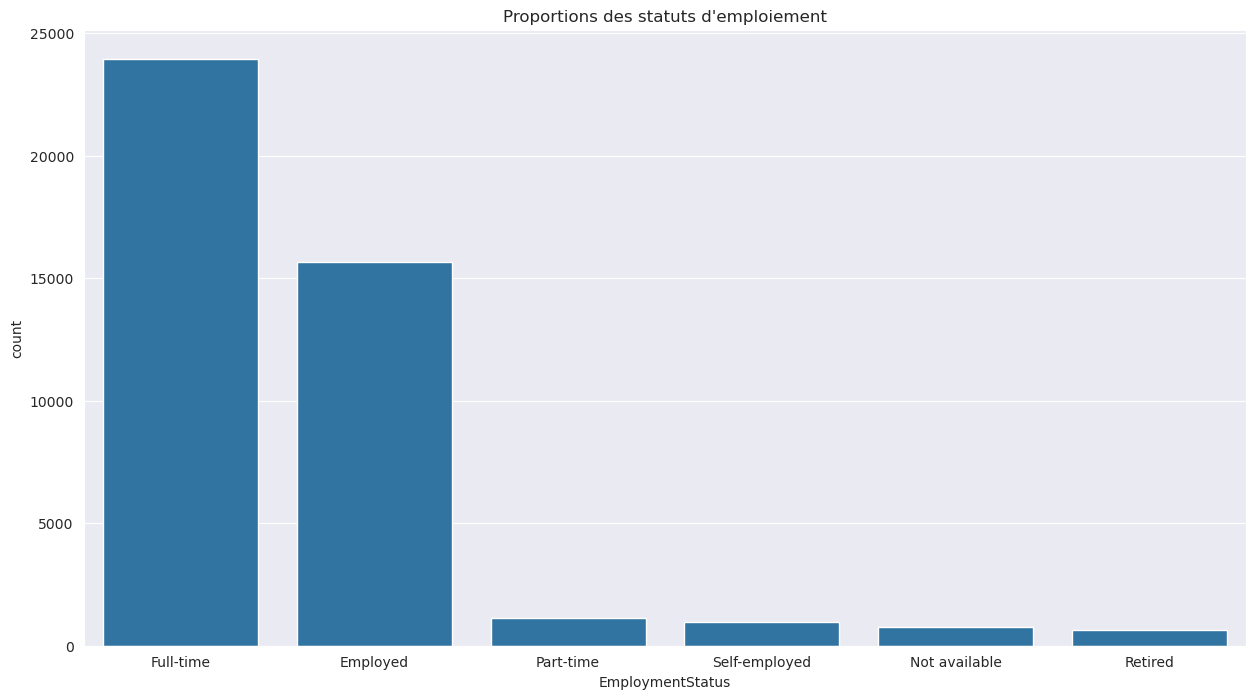

In [8]:
plt.figure(figsize = [15,8])
sns.countplot(data = df_loan, x = 'EmploymentStatus', color = default_color, order=df_loan.EmploymentStatus.value_counts().index).set(title="Proportions des statuts d'emploiement")
plt.show()

## Distribution des montants de crédit

> Les montants de crédits dans ce dataset varient de 1000 jusqu'à 35000. Avec une transformation logarithmique on voit qu'une grande proportion des salaires est comprise entre 2000 et 15000.

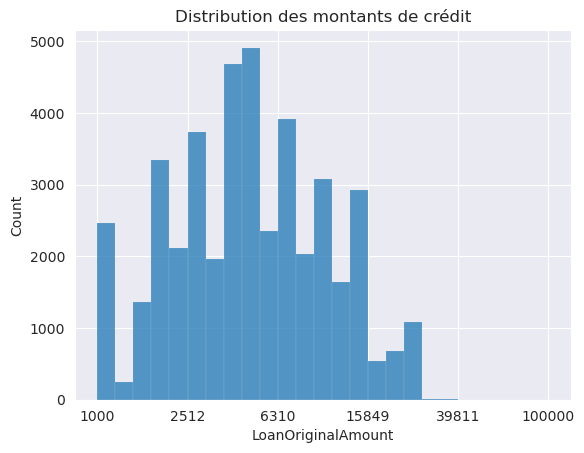

In [9]:
bins = 10**np.arange(3,5 + 0.08,0.08)

plt.figure()
sns.histplot(df_loan.LoanOriginalAmount,bins = bins)
plt.xscale('log')
ticks = 10**np.linspace(3, 5, 6)
plt.xticks(ticks, ['{:.0f}'.format(tick) for tick in ticks])
plt.title("Distribution des montants de crédit")
plt.show()

## Taux d'intérêt par note de créditeur

> On a une relation très claire entre le taux d'intérêt et la note du créditeur, tel que les meilleurs notes ont des taux plus faible que les mauvaise notes.

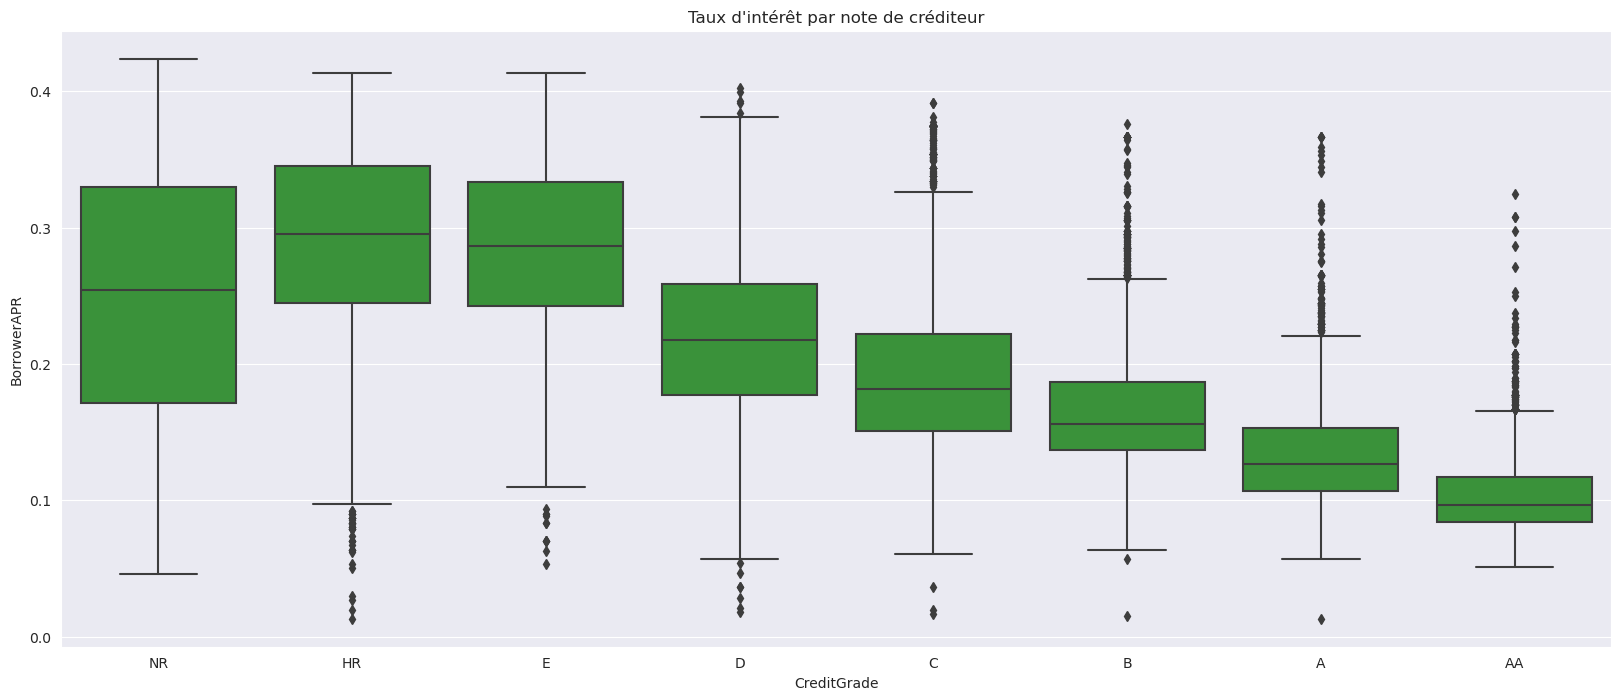

In [10]:
plt.figure(figsize = [20,8])
default_color = sns.color_palette()[2]
sns.boxplot(data = df_loan, x = 'CreditGrade', y = 'BorrowerAPR', color = default_color)
plt.title("Taux d'intérêt par note de créditeur")
plt.show()

## Taux d'intérêt par statut d'emploiement et salaire

> On peut voir dans ce diagramme que le taux d'intérêt devient plus faible quand le salaire augmente, sauf pour le cas des entrepreneurs où le taux d'intérêt maintient une valeur un peu faible par rapport aux autres statuts mais cette valeur ne varie pas trop avec leur revenu.

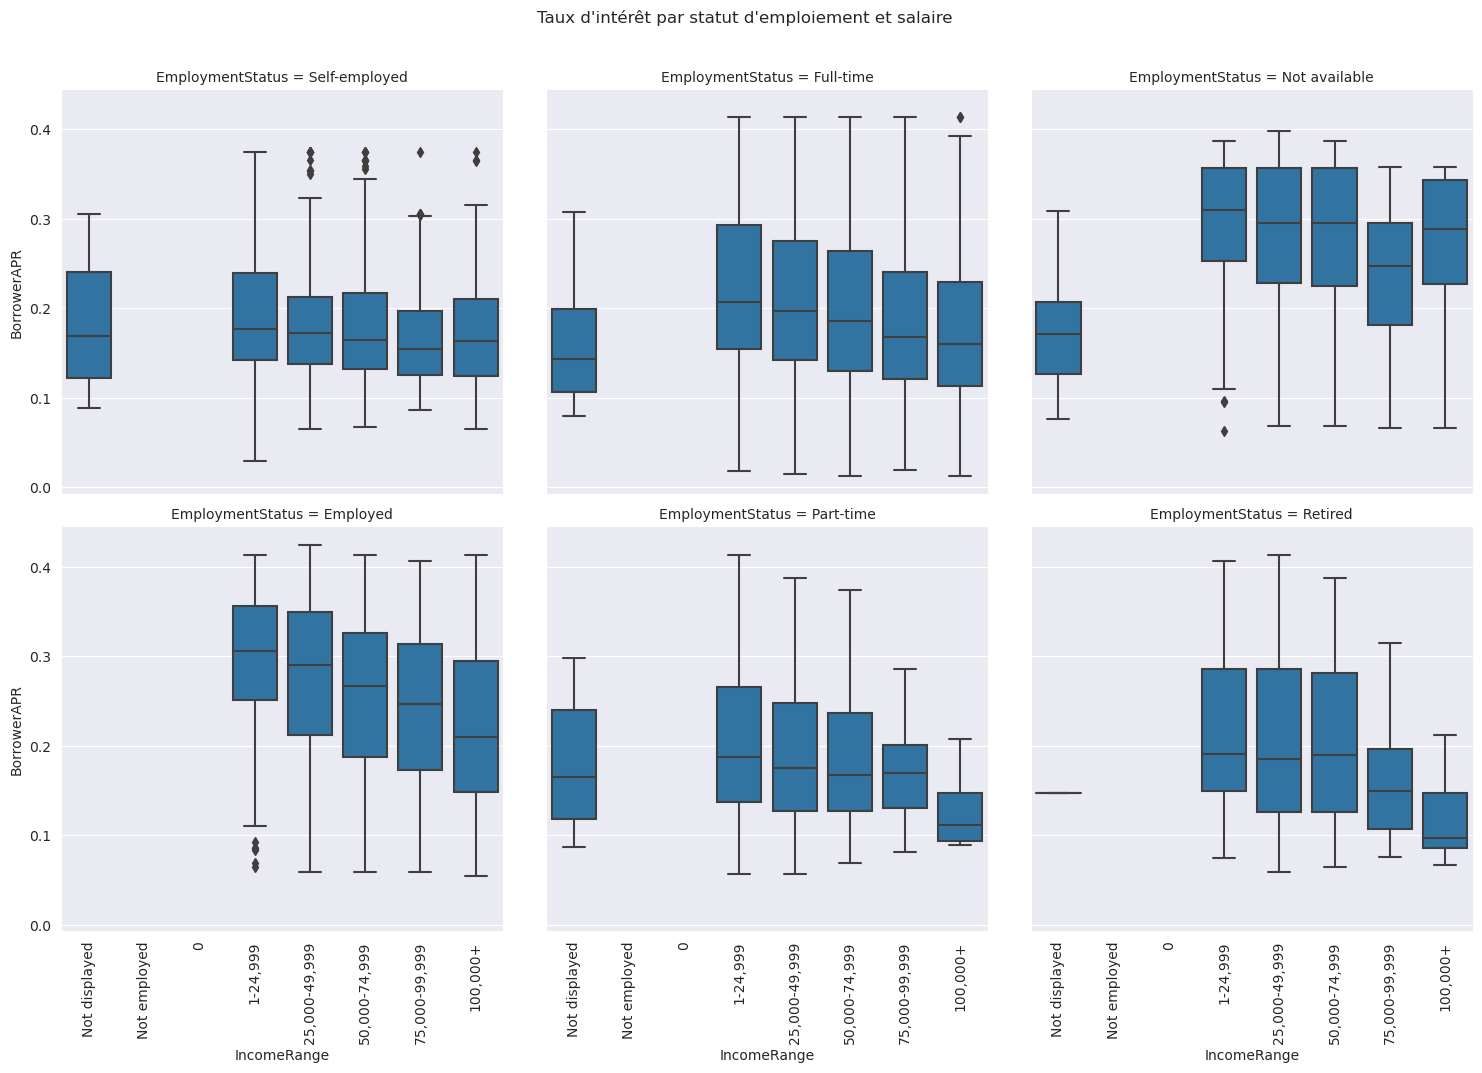

In [11]:
g = sns.FacetGrid(data = df_loan, col='EmploymentStatus', col_wrap=3, height =5)
g.map(sns.boxplot, 'IncomeRange', 'BorrowerAPR')
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Taux d'intérêt par statut d'emploiement et salaire")
plt.show()

## Proportions des statuts de crédit

> Au niveau du dataset on remarque qu'on a une proportion très élevé du statut `Completed`

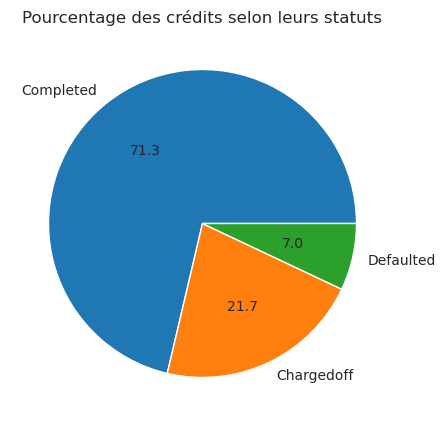

In [12]:
plt.figure(figsize=(5,5))
x = df_loan['LoanStatus'].value_counts()
plt.pie(x.values, autopct='%.1f', labels = x.index)
plt.title("Pourcentage des crédits selon leurs statuts")
plt.show()

## Statut de cérdit par salaire

> Avant de pouvoir visualiser cette relation, il a été nécessaire d'équilibrer le nombre des observations au niveau des statuts des crédit et des différents salaires. Le résultat montre clairement l'augmentation de la proportion du statut `Completed` pour les salaires élevé.

In [13]:
df_loan_completed = df_loan.query('LoanStatus == "Completed"')
df_loan_defaulted= df_loan.query('LoanStatus == "Defaulted"')
df_loan_chargedoff = df_loan.query('LoanStatus == "Chargedoff"')
print(f"Completed : {len(df_loan_completed)} , Defaulted : {len(df_loan_defaulted)}, Chargedoff : {len(df_loan_chargedoff)}")
size = min(len(df_loan_completed), len(df_loan_defaulted), len(df_loan_chargedoff))
df_loan_completed = df_loan_completed.sample(size, replace=False, random_state=0)
df_loan_chargedoff = df_loan_chargedoff.sample(size, replace=False, random_state=0)

#test
assert df_loan_completed.shape[0] == df_loan_chargedoff.shape[0] == df_loan_defaulted.shape[0]

df_loan_eq_status = pd.concat([df_loan_chargedoff, df_loan_completed, df_loan_defaulted], axis=0)

# test 
assert df_loan_eq_status.shape[0] == 3*size

df_loan_eq_status.sample(5)

Completed : 30727 , Defaulted : 3023, Chargedoff : 9329


,CreditGrade,Occupation,EmploymentStatus,IncomeRange,LoanOriginationDate,MemberKey,Term,ListingCategory,CreditScoreRangeLower,CreditScoreRangeUpper,TradesNeverDelinquent,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LoanStatus,BorrowerAPR
26166,C,Analyst,Full-time,"50,000-74,999",2007-10-01,5CE4339734572379605055E,36,7,640.0,659.0,0.83,0.49,5277.083333,20000,733.12,Defaulted,0.19730
33294,A,Computer Programmer,Full-time,"75,000-99,999",2007-05-24,862B3366242787163508508,36,7,740.0,759.0,1.00,0.26,7083.333333,10000,336.94,Completed,0.13705
18170,AA,Social Worker,Full-time,"50,000-74,999",2008-01-23,7DA4340484852684947DA65,36,1,760.0,779.0,0.93,0.22,4279.583333,8900,278.89,Completed,0.08684
31903,NR,Clerical,Full-time,"25,000-49,999",2011-05-04,44513487265404372E61400,36,6,660.0,679.0,1.00,0.95,3000.000000,3500,146.65,Chargedoff,0.32576
9334,B,Sales - Commission,Self-employed,"50,000-74,999",2007-09-27,6E1D3399348630547E0E038,36,7,700.0,719.0,0.61,0.39,5833.333333,22500,918.57,Chargedoff,0.27767


In [14]:
df_income_1 = df_loan_eq_status.query("IncomeRange == '1-24,999'")
df_income_25 = df_loan_eq_status.query("IncomeRange == '25,000-49,999'")
df_income_50 = df_loan_eq_status.query("IncomeRange == '50,000-74,999'")
df_income_75 = df_loan_eq_status.query("IncomeRange == '75,000-99,999'")
df_income_100 = df_loan_eq_status.query("IncomeRange == '100,000+'")

print(len(df_income_1), len(df_income_25), len(df_income_50), len(df_income_75), len(df_income_100))
size = min(len(df_income_1), len(df_income_25), len(df_income_50), len(df_income_75), len(df_income_100))

df_income_25 = df_income_25.sample(size, replace=False, random_state=0)
df_income_50 = df_income_50.sample(size, replace=False, random_state=0)
df_income_75 = df_income_75.sample(size, replace=False, random_state=0)
df_income_100 = df_income_100.sample(size, replace=False, random_state=0)

df_income_status = pd.concat([df_income_1, df_income_25, df_income_50, df_income_75, df_income_100])

# Test
assert df_income_status.shape[0] == 5*size

865 3479 2543 1121 1019


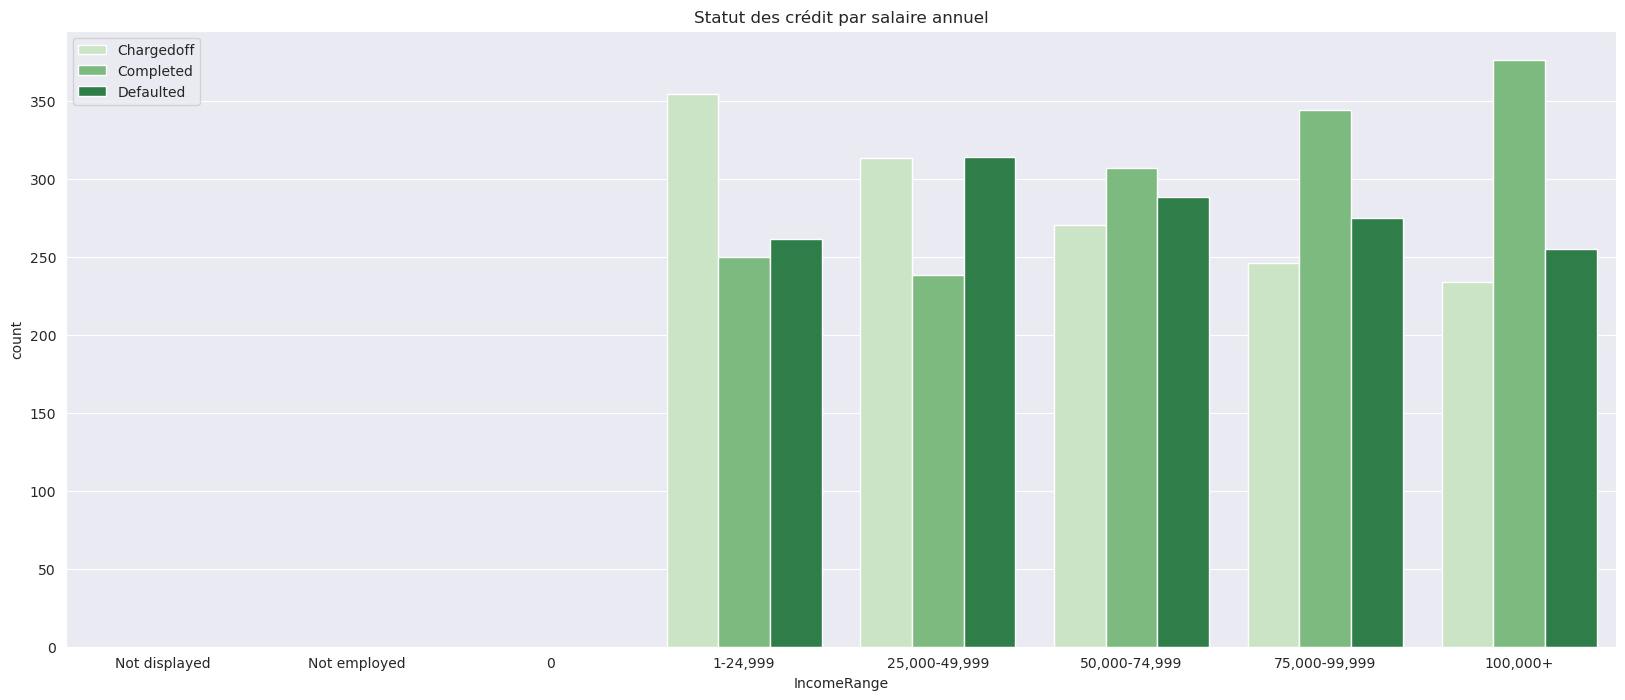

In [15]:
plt.figure(figsize=[20,8])
sns.countplot(data = df_income_status, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Greens')
plt.legend(loc = 'upper left')
plt.title("Statut des crédit par salaire annuel")
plt.show()

## Statut du crédit par montant du crédit et statut d'emploiement 

> On voit bien que les crédits avec le statut `Completed` ont des montants plus faibles par rapport aux autres statuts au niveau de chaque statut d'emploiement. (sauf pour le cas `Employed` qui regroupe plusieurs statuts)

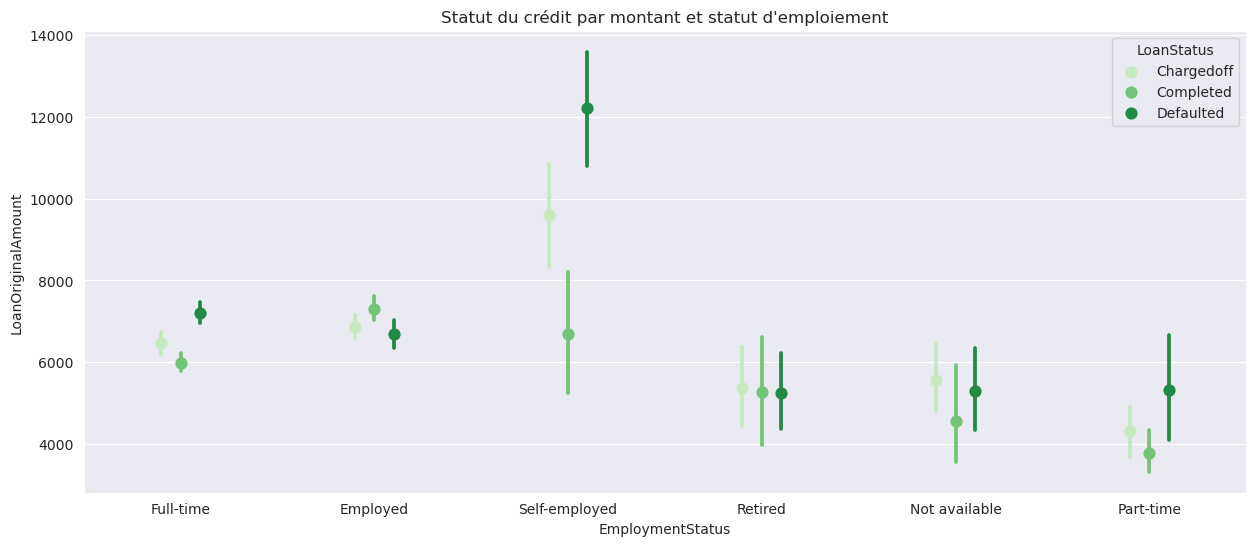

In [16]:
plt.figure(figsize=(15,6))
sns.pointplot(data=df_loan_eq_status, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue='LoanStatus', dodge=0.2, palette = 'Greens', join=False)
plt.title("Statut du crédit par montant et statut d'emploiement")
plt.show()

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1046783 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
